# The World Happiness Report Data Analysis

## Table of Contents


[A. Importing, cleaning and numerical summaries](#Import) <br>
[B. Indexing and grouping](#Indexing) <br>
[C. Bar plot of the Happiness Score](#plot) <br>
[D. Histogram of Job Satisfaction](#hist) <br>
[E. Pairwise Scatter plots](#scat) <br>
[F. Correlation](#corr) <br>
[G. Probabilities](#prob) <br>
[H. Matrices](#mat)



***

## A. Importing, cleaning and numerical summaries
<a id="Import" > 

1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.
3. Check the number of observations.
4. Obtain the column headings.
5. Check the data type for each column.
6. Check if there are any missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8. Obtain the mean, minimum and maximum value for each column containing numerical data.
9. List the 10 happiest countries.
10. List the 10 least happy countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
WHR = pd.read_csv("World Happiness Report.csv")

In [4]:
# Obtain the column headings
WHR.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [6]:
WHR.shape

(153, 12)

In [8]:
print("There are {} rows ".format(WHR.shape[0]) + "and {} columns in our data".format(WHR.shape[1]))

There are 153 rows and 12 columns in our data


In [9]:
WHR.set_index('Country', inplace=True)

In [10]:
# Check the data type for each column
WHR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Norway to Central African Republic
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Happiness Rank    153 non-null    int64  
 1   Happiness Score   153 non-null    float64
 2   Economy           153 non-null    float64
 3   Family            153 non-null    float64
 4   Health            153 non-null    float64
 5   Freedom           153 non-null    float64
 6   Generosity        153 non-null    float64
 7   Corruption        153 non-null    float64
 8   Dystopia          153 non-null    float64
 9   Job Satisfaction  151 non-null    float64
 10  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ KB


In [14]:
# Check if there are any missing values
WHR.isnull().sum()

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [22]:
nu0=WHR.isnull().any(axis=0)
nu0

Happiness Rank      False
Happiness Score     False
Economy             False
Family              False
Health              False
Freedom             False
Generosity          False
Corruption          False
Dystopia            False
Job Satisfaction     True
Region              False
dtype: bool

In [23]:
nu1=WHR.isnull().any(axis=1)
nu1

Country
Norway                      False
Denmark                     False
Iceland                     False
Switzerland                 False
Finland                     False
                            ...  
Rwanda                      False
Syria                       False
Tanzania                    False
Burundi                     False
Central African Republic    False
Length: 153, dtype: bool

In [18]:
NULLS = WHR[WHR.isnull().any(axis=1)]

In [16]:
NULLS.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [24]:
WHR.dropna(inplace=True)

In [25]:
WHR.isnull().sum()

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

In [51]:
#生成重复数据,
dup=pd.DataFrame(np.ones([7,2]),columns=['col1','col2'])
dup['col3']=['a','b','a','c','d','c','c']
dup['col4']=[3,2,3,2,5,2,2]
dup=dup.reindex(columns=['col3','col4','col1','col2'])  #将新增的一列排在第一列
dup

,col3,col4,col1,col2
0,a,3,1.0,1.0
1,b,2,1.0,1.0
2,a,3,1.0,1.0
3,c,2,1.0,1.0
4,d,5,1.0,1.0
5,c,2,1.0,1.0
6,c,2,1.0,1.0


In [52]:
# 判断重复数据
isdup=dup.duplicated()
isdup

0    False
1    False
2     True
3    False
4    False
5     True
6     True
dtype: bool

In [53]:
# 对整行进行查重，return 重复了的数据，且只现实n-1条重复的数据（n是重复的次数）
dup[dup.duplicated() == True]

,col3,col4,col1,col2
2,a,3,1.0,1.0
5,c,2,1.0,1.0
6,c,2,1.0,1.0


In [55]:
# 删除重复值
# 将所有重复的数据都去掉了，且默认保留重复数据的第一条
new_dup1=dup.drop_duplicates() # 删除数据记录中所有列值相同的记录
new_dup2=dup.drop_duplicates(['col4']) # 删除数据记录中col4列值相同的记录
new_dup3=dup.drop_duplicates(['col3','col4']) # 删除数据记录中(col3和col4)列值相同的记录
print(new_dup1)
print(new_dup2)
print(new_dup3)


  col3  col4  col1  col2
0    a     3   1.0   1.0
1    b     2   1.0   1.0
3    c     2   1.0   1.0
4    d     5   1.0   1.0
  col3  col4  col1  col2
0    a     3   1.0   1.0
1    b     2   1.0   1.0
4    d     5   1.0   1.0
  col3  col4  col1  col2
0    a     3   1.0   1.0
1    b     2   1.0   1.0
3    c     2   1.0   1.0
4    d     5   1.0   1.0


In [56]:
WHR.duplicated().sum()

0

In [57]:
WHR.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [67]:
# sort() 和 sorted() 用于list 和 dataframe 排序，不适用于series
# 原址排序
x  =  [ 4 ,  6 ,  2 ,  1 ,  7 ,  9 ]
x.sort()
print(x)  # [1, 2, 4, 6, 7, 9]

# 副本排序——[:]分片方法
x  = [ 4 ,  6 ,  2 ,  1 ,  7 ,  9 ]
y  =  x[ : ]
y.sort()
print(y)  #[1, 2, 4, 6, 7, 9]
print(x)  #[4, 6, 2, 1, 7, 9]

# 副本排序——sorted方法
x  = [ 4 ,  6 ,  2 ,  1 ,  7 ,  9 ]
y  =  sorted (x)
print(y)  #[1, 2, 4, 6, 7, 9]
print(x)  #[4, 6, 2, 1, 7, 9] 

print(sorted ( 'Python' ))

[1, 2, 4, 6, 7, 9]
[1, 2, 4, 6, 7, 9]
[4, 6, 2, 1, 7, 9]
[1, 2, 4, 6, 7, 9]
[4, 6, 2, 1, 7, 9]
['P', 'h', 'n', 'o', 't', 'y']


In [58]:
WHR.sort_values(by="Happiness Rank", ascending=True).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [59]:
WHR.sort_values(by="Happiness Rank", ascending=False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


***

## B. Indexing and grouping
<a id="Indexing" > 

1. Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions: North America, Latin America, Western Europe, Eastern Europe, Asia Pacific, Africa.
2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.
3. Compute the number of countries in each region that have a happiness score above 6.0.
4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [70]:
WHR_Region = WHR.groupby('Region')

In [69]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Europe,1.0,4.096000,NaN,4.096,4.09600,4.0960,4.09600,4.096
Africa,43.0,4.254581,0.682470,2.693,3.80150,4.1900,4.63450,5.872
Asia-Pacific,43.0,5.358326,0.955062,3.462,4.65000,5.2690,6.02750,7.314
Eastern Europe,21.0,5.498952,0.402033,4.644,5.23700,5.5690,5.83800,6.098
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Western Europe,19.0,6.880474,0.611070,5.195,6.56800,6.9510,7.42300,7.537
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316


In [72]:
WHR["Region"]=="Europe"

Country
Norway                      False
Denmark                     False
Iceland                     False
Switzerland                 False
Finland                     False
                            ...  
Rwanda                      False
Syria                       False
Tanzania                    False
Burundi                     False
Central African Republic    False
Name: Region, Length: 151, dtype: bool

In [71]:
WHR[WHR["Region"]=="Europe"].head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


In [78]:
WHR = WHR.replace('Europe', 'Eastern Europe')
WHR1=WHR['Region'].drop_duplicates()
WHR1

Country
Norway         Western Europe
Canada          North America
New Zealand      Asia-Pacific
Costa Rica      Latin America
Slovakia       Eastern Europe
Algeria                Africa
Name: Region, dtype: object

In [74]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316
Western Europe,19.0,6.880474,0.611070,5.195,6.56800,6.9510,7.42300,7.537
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Eastern Europe,21.0,5.498952,0.402033,4.644,5.23700,5.5690,5.83800,6.098
Asia-Pacific,43.0,5.358326,0.955062,3.462,4.65000,5.2690,6.02750,7.314
Africa,43.0,4.254581,0.682470,2.693,3.80150,4.1900,4.63450,5.872
Europe,1.0,4.096000,NaN,4.096,4.09600,4.0960,4.09600,4.096


In [79]:
WHR_A = WHR[WHR['Region'] == 'Africa']
WHR_WE = WHR[WHR['Region'] == 'Western Europe']
WHR_EE = WHR[WHR['Region'] == 'Eastern Europe']
WHR_LA = WHR[WHR['Region'] == 'Latin America']
WHR_AP = WHR[WHR['Region'] == 'Asia-Pacific']
WHR_NA = WHR[WHR['Region'] == 'North America']

In [80]:
len(WHR_A[WHR_A['Happiness Score'] > 6])

0

In [81]:
print("There are {} countries in Africa that have a happiness score above 6.0 ".format(len(WHR_A[WHR_A['Happiness Score'] > 6])))


There are 0 countries in Africa that have a happiness score above 6.0 


In [82]:
len(WHR_WE[WHR_WE['Happiness Score'] > 6])

17

In [83]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(WHR_WE[WHR_WE['Happiness Score'] > 6])))


There are 17 countries in Western Europe that have a happiness score above 6.0 


In [84]:
len(WHR_EE[WHR_EE['Happiness Score'] > 6])

1

In [85]:
print("There is {} country in Eastern Europe that has a happiness score above 6.0 ".format(len(WHR_EE[WHR_EE['Happiness Score'] > 6])))


There is 1 country in Eastern Europe that has a happiness score above 6.0 


In [86]:
len(WHR_AP[WHR_AP['Happiness Score'] > 6])

11

In [87]:
print("There are {} countries in the Asia Pacific that have a happiness score above 6.0 ".format(len(WHR_AP[WHR_AP['Happiness Score'] > 6])))


There are 11 countries in the Asia Pacific that have a happiness score above 6.0 


In [88]:
len(WHR_LA[WHR_LA['Happiness Score'] > 6])

13

In [89]:
print("There are {} countries in the Latin America that have a happiness score above 6.0 ".format(len(WHR_LA[WHR_LA['Happiness Score'] > 6])))


There are 13 countries in the Latin America that have a happiness score above 6.0 


In [90]:
len(WHR_NA[WHR_NA['Happiness Score'] > 6])

2

In [91]:
print("There are {} countries in the North America that have a happiness score above 6.0 ".format(len(WHR_NA[WHR_NA['Happiness Score'] > 6])))


There are 2 countries in the North America that have a happiness score above 6.0 


In [93]:
Delta_NA = WHR_NA.max(axis=0)['Happiness Score'] - WHR_NA.min(axis=0)['Happiness Score']
print(Delta_NA)

0.32299995400000014


In [94]:
Delta_EE = WHR_EE.max(axis=0)['Happiness Score'] - WHR_EE.min(axis=0)['Happiness Score']
print(Delta_EE)

2.0019998549999993


In [95]:
Delta_WE = WHR_WE.max(axis=0)['Happiness Score'] - WHR_WE.min(axis=0)['Happiness Score']
print(Delta_WE)

2.3420000069999993


In [96]:
Delta_A = WHR_A.max(axis=0)['Happiness Score'] - WHR_A.min(axis=0)['Happiness Score']
print(Delta_A)

3.1790001390000002


In [97]:
Delta_LA = WHR_LA.max(axis=0)['Happiness Score'] - WHR_LA.min(axis=0)['Happiness Score']
print(Delta_LA)

3.4760000700000004


In [98]:
Delta_AP = WHR_AP.max(axis=0)['Happiness Score'] - WHR_AP.min(axis=0)['Happiness Score']
print(Delta_AP)

3.852000237


In [99]:
Deltas = {}

In [100]:
Deltas["North America"] = Delta_NA
Deltas["Eastern Europe"] = Delta_EE
Deltas["Western Europe"] = Delta_WE
Deltas["Africa"] = Delta_A
Deltas["Latin America"] = Delta_LA
Deltas["Asia Pacific"] = Delta_AP

In [102]:
Deltas

{'North America': 0.32299995400000014,
 'Eastern Europe': 2.0019998549999993,
 'Western Europe': 2.3420000069999993,
 'Africa': 3.1790001390000002,
 'Latin America': 3.4760000700000004,
 'Asia Pacific': 3.852000237}

In [104]:
# max(s [, key=, default= ])
# 命名参数key，其为一个函数，用来指定取最大值的方法。default命名参数用来指定最大值不存在时返回的默认值。

print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))
# dict1.get('key','value'):
# 如果字典中存在关键字key，则返回关键字对应的值；如果字典d中不存在关键字key，则返回value的值，一般默认为None，也可以返回指定的value值

The Asia Pacific region seems to have the largest range of happiness scores


***

## C. Bar plot of the Happiness Score
<a id="plot" > 

1. Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart should have the names of the countries are listed vertically along the 
y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.
2. You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
  * Economy
  * Family
  * Health
  * Freedom
  * Generosity
  * Corruption
  * Dystopia  
  Choose a distinct color for each category and include an appropriate legend with your chart.
3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

In [106]:
WHR['Happiness Score'].head(10)

Country
Norway         7.537
Denmark        7.522
Iceland        7.504
Switzerland    7.494
Finland        7.469
Netherlands    7.377
Canada         7.316
New Zealand    7.314
Sweden         7.284
Australia      7.284
Name: Happiness Score, dtype: float64

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

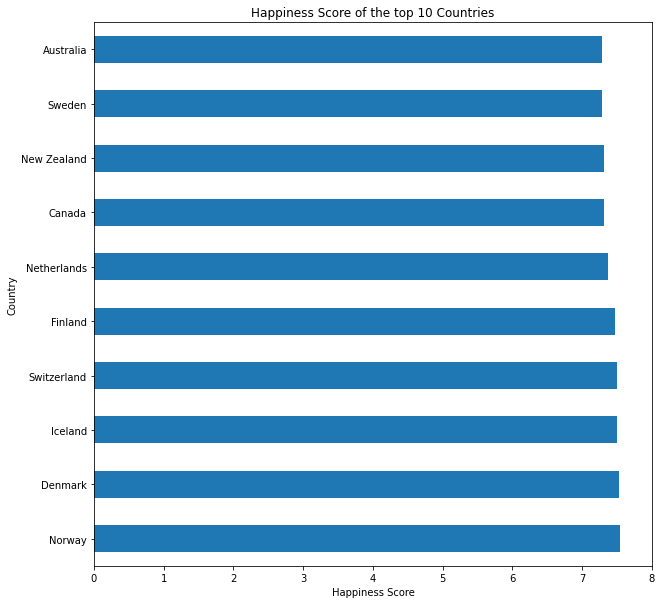

In [107]:
WHR['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

In [108]:
WHR[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10)

,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia
Country,,,,,,,
Norway,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
Netherlands,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
Canada,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
New Zealand,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
Sweden,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538


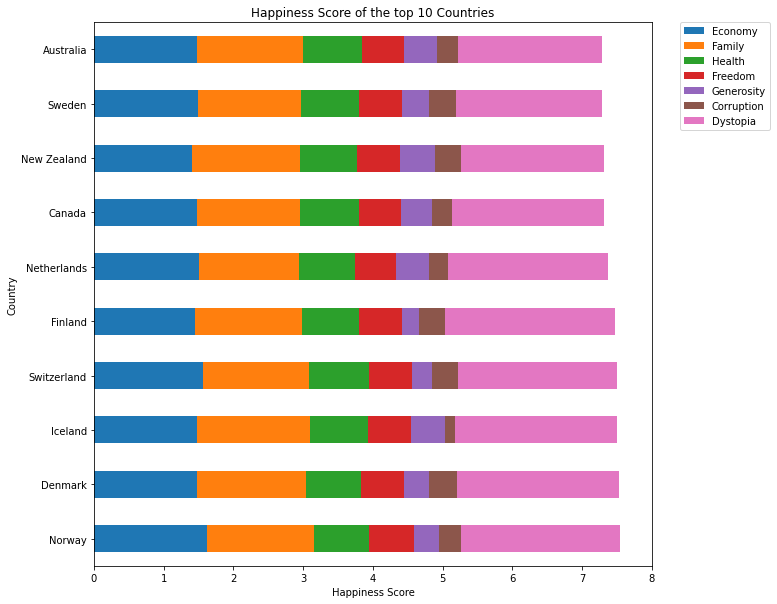

In [112]:
WHR[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

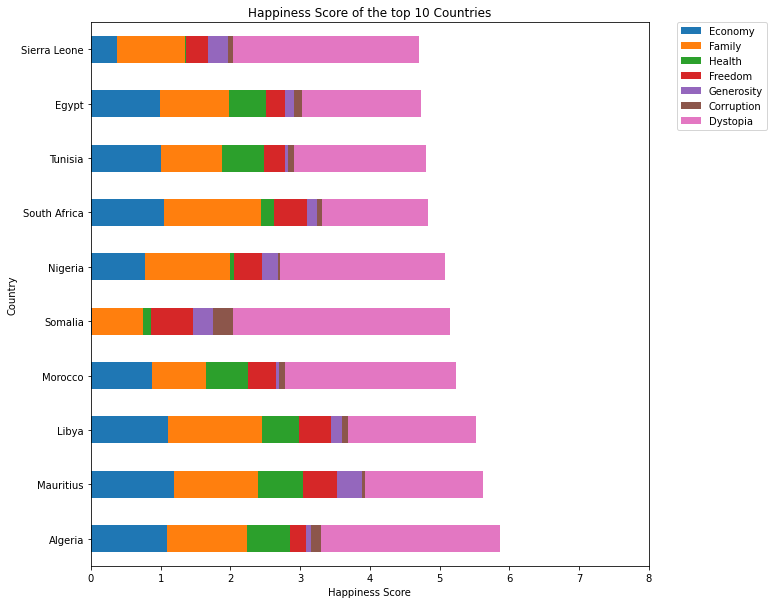

In [113]:
WHR_A[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

***

## D. Histogram of Job Satisfaction
<a id="hist" > 

Obtain a histogram of the Job Satisfaction using the following categories:


Text(0.5, 1.0, 'Distribution of Job Satisfaction')

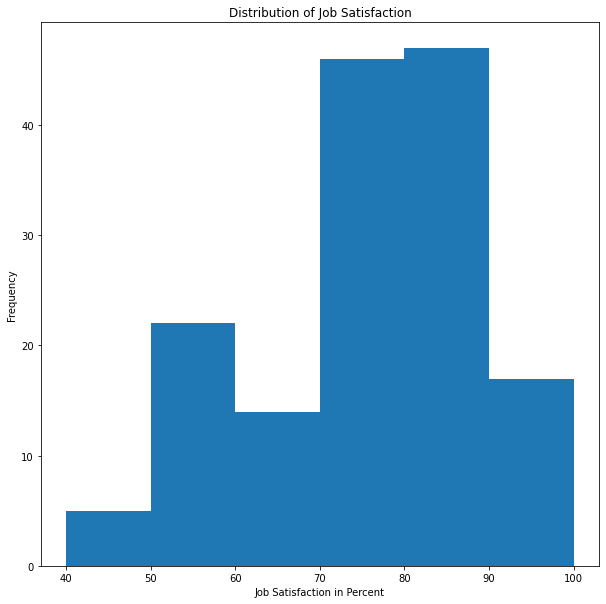

In [114]:
WHR['Job Satisfaction'].plot(kind='hist', bins=[ 40, 50, 60, 70, 80, 90, 100], figsize=(10,10))

plt.xlabel("Job Satisfaction in Percent")
plt.title("Distribution of Job Satisfaction")

***

## E. Pairwise Scatter plots
<a id="scat" > 

Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.

D:\software\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


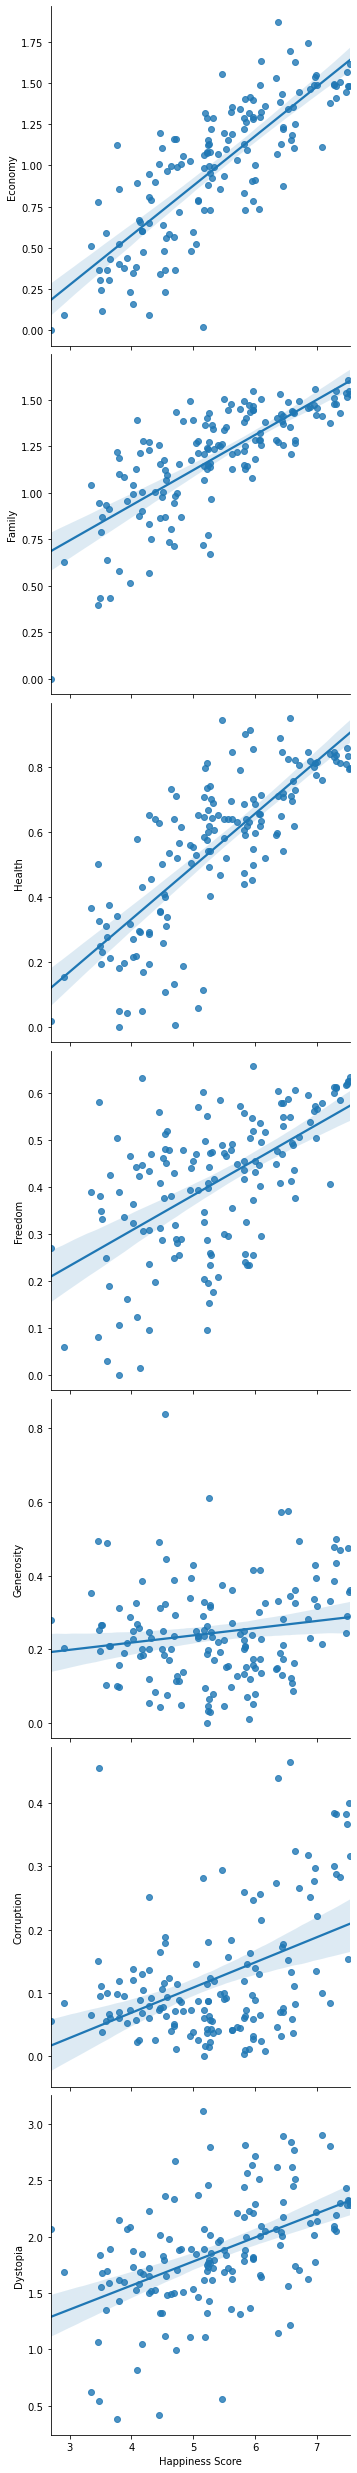

In [115]:
sns.pairplot(data=WHR, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'])

D:\software\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


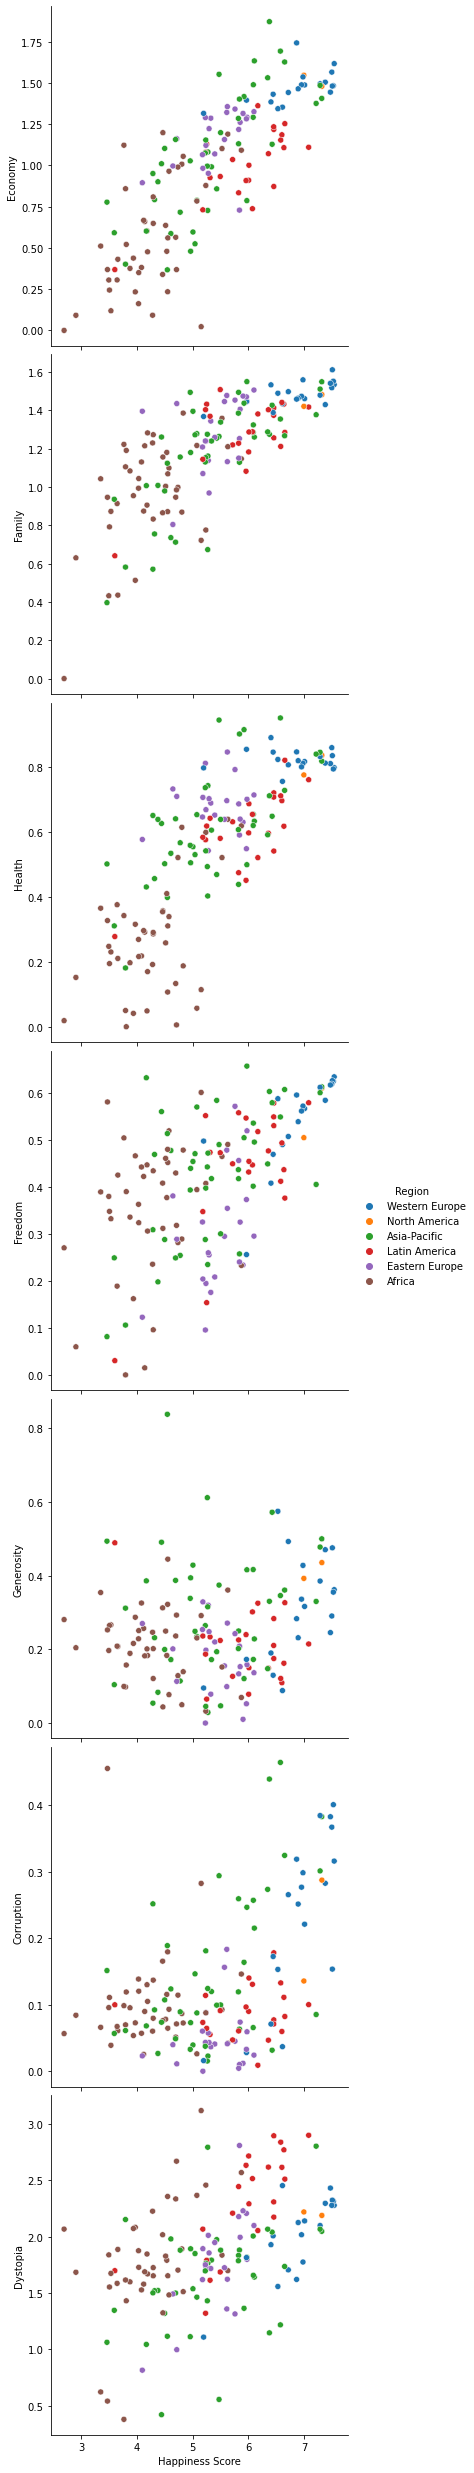

In [116]:
sns.pairplot(data=WHR, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'])

***

## F. Correlation
<a id="corr" > 

Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [117]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score     1.000000
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Happiness Rank     -0.992663
Name: Happiness Score, dtype: float64

In [118]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score     1.000000
Happiness Rank      0.992663
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Name: Happiness Score, dtype: float64

If we ignore the Happiness Rank, Job Satisfaction seems to have the highest correlation with the Happiness Score.

In [119]:
WHR.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.992663,-0.809521,-0.733902,-0.776602,-0.550111,-0.142348,-0.415532,-0.489194,-0.814535
Happiness Score,-0.992663,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873
Economy,-0.809521,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Family,-0.733902,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,-0.776602,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Freedom,-0.550111,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Generosity,-0.142348,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,-0.415532,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,-0.489194,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Job Satisfaction,-0.814535,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000


<ipython-input-120-7176f7faceb5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

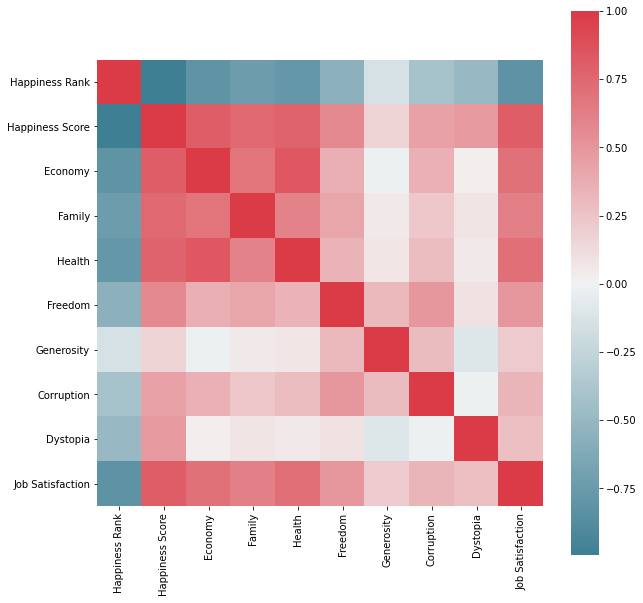

In [120]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

***

## G. Probabilities
<a id="prob" > 

Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

In [123]:
WHR[WHR['Happiness Score'] > 6]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [126]:
WHR[WHR['Happiness Score'] > 6].shape[0]

44

In [127]:
WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

17

In [128]:
float(len(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')]))/float(len(WHR[WHR['Happiness Score'] > 6]))

0.38636363636363635

In [129]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

)/float(WHR[WHR['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 39%


***

## H. Matrices
<a id="mat" > 

Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [130]:
WHR.shape

(151, 11)

In [131]:
Western_Europe = []
Eastern_Europe = []
North_America = []
Latin_America = []
Asia_Pacific = []
Africa = []

In [132]:
for x in WHR['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [133]:
for x in WHR['Region']:
    if x == 'Eastern Europe':
         Eastern_Europe.append(1)
    else: Eastern_Europe.append(0)

In [134]:
for x in WHR['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)

In [135]:
for x in WHR['Region']:
    if x == 'Latin America':
         Latin_America.append(1)
    else: Latin_America.append(0)

In [136]:
for x in WHR['Region']:
    if x == 'Asia-Pacific':
         Asia_Pacific.append(1)
    else: Asia_Pacific.append(0)

In [137]:
for x in WHR['Region']:
    if x == 'Africa':
         Africa.append(1)
    else: Africa.append(0)

In [138]:
Matrix = pd.DataFrame(index=WHR.index)

In [139]:
Matrix['Western Europe'] = Western_Europe
Matrix['Eastern Europe'] = Eastern_Europe
Matrix['North America'] = North_America
Matrix['Latin America'] = Latin_America
Matrix['Asia Pacific'] = Asia_Pacific
Matrix['Africa'] = Africa

In [140]:
Matrix.head(20)

,Western Europe,Eastern Europe,North America,Latin America,Asia Pacific,Africa
Country,,,,,,
Norway,1,0,0,0,0,0
Denmark,1,0,0,0,0,0
Iceland,1,0,0,0,0,0
Switzerland,1,0,0,0,0,0
Finland,1,0,0,0,0,0
Netherlands,1,0,0,0,0,0
Canada,0,0,1,0,0,0
New Zealand,0,0,0,0,1,0
Sweden,1,0,0,0,0,0


In [144]:
# 读取一些excel/csv文件的数据后，在训练模型之前经常要对数据进行数组转化
# 很多时候取得的数据是DataFrame的形式，这个时候要记得转换成数组
array_Matrix = Matrix.values

In [143]:
# 此方法进行数组转化已经淘汰，不可用了，要用   .values ，即上述方法
array_Matrix = Matrix.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [452]:
array_Matrix

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
 